# GPGN409 homework 
your name: Benjamin Nguyen

## Purpose 

This homework is an introduction to evaluating functions in Python, as well as an example of the code organization and documentation that will be expected in the course. For full credit, answer all questions and write clean, well-documented code. 

Keep variable names short but descriptive. Use functions to avoid repeating code. Remember to restart and rerun your notebook before submitting it to ensure the code runs correctly. 

The first part of the assignment is a good example of code organization and documentation that you might want to use for future work, but feel free to use your own style. 

## Scoring 

The scoring breakdown for **GPGN 409** is: 

- part 1, required (25 points)
- part 2, required (25 points)
- part 3, required (25 points)
- part 4, extra credit (optional +25 points) 
- coding style, organization, documentation (25 points)

------

The scoring breakdown for **GPGN 509** is: 

- part 1, required (25 points)
- part 2, required (25 points)
- part 3, required (25 points)
- part 4, required (25 points) 
- coding style, organization, documentation (25 points)

## Part 0: imports 

In [66]:
import numpy as np
from scipy.signal import convolve2d
from PIL import Image
from matplotlib import pyplot as plt

import gauss as gau
import cubePlot as cp
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = False


## Part 1: using gauss.py and cubePlot.py <span style="color:red">(Required for all)</span>

Consider the Gaussian function, 

$$
f(x,y) = \frac{1}{2\pi\sigma_x\sigma_y} e^{-\left(\frac{(x-\bar{x})^2}{2\sigma_x^2} + \frac{(y-\bar{y})^2}{2\sigma_y^2}\right)}
$$

where $x\in[-10,10]$, $y\in[-10,10]$. We'll talk a lot more about how useful this function is later in the semester. For now, we'll just use the Gaussian to make some plots and work with other python files. 

To evaluate this function, we need to know the center on the $x$ axis, 

$\bar{x} = 3$

the standard deviation in $x$,

$\sigma_x = 1$

the center on the $y$ axis, 

$\bar{y} = 2$

and the standard deviation in $y$, 

$\sigma_y = 2$.

Now, we can use the <span style="color:blue">gauss.py</span> file on Canvas to easily implement this 2D Gaussian function with the provided four parameters.

### 1.1 create an x and y axis

In [67]:
## provide the variables with the correct values

xmin = -10.                             # [m] minimum x value
xmax = 10.                              # [m] maximum x value
nx   = 101                              # [.] number of samples in x direction
dx   = (xmax-xmin)/(nx-1)               # [m] distance between x values
xx   = np.linspace(xmin, xmax, nx)      # [.] x axis

xCEN = 3.                               # [m] center of the Gaussian
xSTD = 1.                               # [m] standard deviation of the Gaussian

In [68]:
## provide the variables with the correct values

ymin = -10                              # [m] minimum y value
ymax = 10                               # [m] maximum y value
ny   = 101                              # [.] number of samples in y direction
dy   = (ymax-ymin)/(ny-1)               # [m] distance between y values
yy   = np.linspace(ymin, ymax, ny)      # [.] y axis

yCEN = 2.                               # [m] center of the Gaussian
ySTD = 2.                               # [m] standard deviation of the Gaussian

### 1.2 use the gauss.py file to create the 2D Gaussian function

In [69]:
## pass the variables to get the 2D Gaussian 

fxy = gau.gauss2D(xx,xCEN,xSTD, 
            yy,yCEN,ySTD)

### 1.3 plot the 2D Gaussian function using the cubePlot.py file

The <span style="color:blue">cubePlot.py</span> is also available on Canvas.

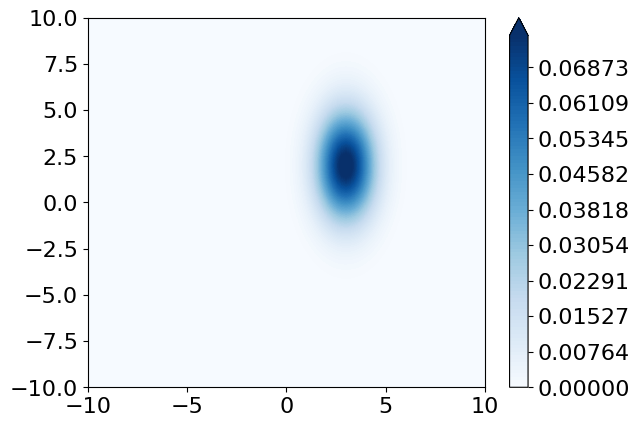

In [70]:
## pass the variables to plot the 2D Gaussian

cp.plot2D(xx, yy, fxy)

## Part 2: discrete probabilities <span style="color:red">(Required for all)</span>

Imagine a room containing $24$ students whose ages are distributed as follows:

- 1 student aged 14
- 1 student aged 15 
- 3 students aged 16 
- 2 students aged 22 
- 2 students aged 24
- 5 students aged 25

where $N(j)$ represents the number of students who are $j$ years old, then, 

- N(14) = 1
- N(15) = 1
- N(16) = 3
- N(22) = 2
- N(24) = 2
- N(25) = 5

Then the *total* number of people in the room is: 
$$
N = \sum_{j=0}^{\infty}N(j)
$$

The probability of selecting a random student from the room who is $j$ years old is: 
$$
P(j) = \frac{N(j)}{N}
$$

The average value of ages $j$, denoted as $\langle j \rangle$, is given by:
$$
\langle j \rangle = \frac{\sum jN(j)}{N} = \sum_{j=0}^{\infty}jP(j)
$$

#### 2.1 If you selected one student at random from the room, what is the probability that the student is 15 years old? 

The *total* number of people in the room is 14

The probability that student is 15 years old is:
$$
P(j) = \frac{N(j)}{N} = 1/14 \approx 7.14 \%
$$



#### 2.2 What is the most probable age? 

The most probable age is the age that has the most people. So 25 is the most probable age

#### 2.3 What is the median age? 

Median is middle value separating the greater and lesser halves of a data set. Lets write down the all data set:
```
[14, 15, 16, 16, 16, 22, 22, 24, 24, 25, 25, 25, 25, 25]
```

Median is:
$$
(22+24)/2 = 23
$$

#### 2.4 What is the average age? 

The average age:
$$
\langle j \rangle = \frac{\sum j N(j)}{N} = \frac{14 \times 1 + 15 \times 1 + 16 \times 3 + 22 \times 2 + 24 \times 2 + 25 \times 5}{1 + 1 + 3 + 2 + 2 + 5} = 21.0
$$

## Part 3: introduction to matrix operations in Python <span style="color:red">(Required for all)</span>

We will be using a lot of matrix math in this course to solve our inverse problems. One of the most common headaches in homework assignments is properly creating these matrices and ensuring that they are the correct size. In this section, you will practice creating matrices and performing basic matrix operations in Python. The most important thing is to ensure you use the *correct matrix dimensions* whenever you are performing matrix operations.

You may find https://numpy.org/devdocs/reference/routines.array-creation.html useful for the following questions  

#### 3.0 use $nx$ and $ny$ as the size in $x$ and $y$ 

In [71]:
nx = 401           # [.] number of samples in x direction 
ny = 401           # [.] number of samples in y direction

#### 3.1 create and plot a $nx \times ny$ identity matrix 

In [72]:
iden = np.eye(nx, ny)

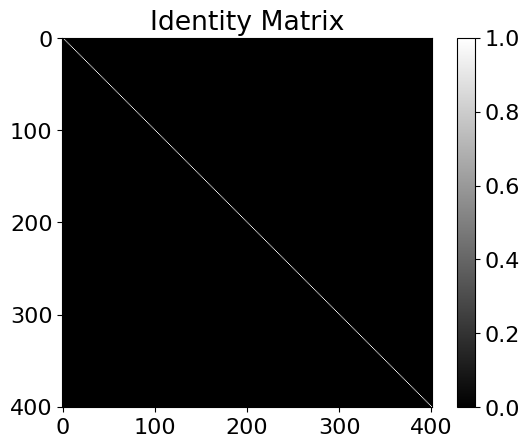

In [73]:
## plot 
plt.imshow(iden, cmap='gray')
plt.title('Identity Matrix')
plt.colorbar()
plt.show()

#### 3.2 create and plot a $nx \times ny$ matrix of all ones 

In [74]:
ones = np.ones((nx, ny))

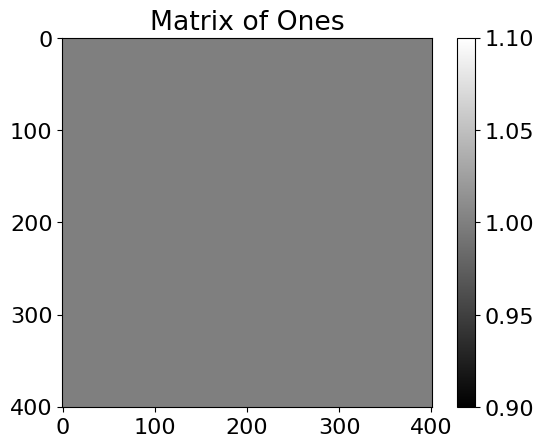

In [75]:
## plot 
plt.imshow(ones, cmap='gray')
plt.title('Matrix of Ones')
plt.colorbar()
plt.show()

#### 3.3 create and plot the 2D finite difference filter


$$ 
FD2D = 
\begin{bmatrix}
1 & 0 & \dots &  & 0 \\ 
1 & -2 & 1 & \\
\vdots & \ddots & \ddots & \ddots  & \\
&  & 1 & -2 & 1 \\
0 & & & 0 & 1 
\end{bmatrix}
$$

In [76]:
triDiag = np.zeros((nx, nx))
np.fill_diagonal(triDiag, -2) 
np.fill_diagonal(triDiag[1:], 1) 
np.fill_diagonal(triDiag[:, 1:], 1)

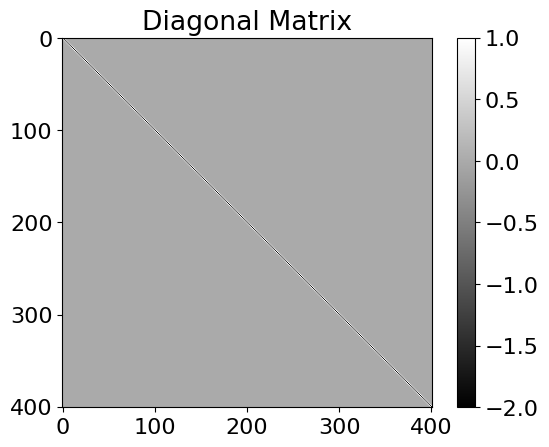

In [77]:
## plot 
plt.imshow(triDiag, cmap='gray')
plt.title('Diagonal Matrix')
plt.colorbar()
plt.show()

#### 3.4 implement the function below 


Consider the function 
$$ 
f(z) = 10 \sqrt{z} 
$$

where $z\in[0,401]$.

In [78]:
def f(x):
    '''
    f(x) = 10 * sqrt(z)

    Parameters:
    x: The input value.

    Returns:
    float: The value of the function f(x).
    '''
    return 10 * (x ** 0.5)

In [79]:
zmin = 0
zmax = 401
nz = 401
dz = (zmax-zmin)/(nz-1)
zz   = np.linspace(zmin, zmax, nz)      # [.] x axis

In [80]:
## evaluate the function on the x-axis 
fz = f(zz)

#### 3.5 create a matrix of size $nx \times ny$ where $nx=401$ and $ny=401$ 

In [81]:
mat = np.zeros([nx, ny])

#### 3.6 fill the main diagonal of the matrix with the values of $f(x)$ 

In [82]:
np.fill_diagonal(mat, fz)

#### 3.7 plot the matrix 


Check out https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pcolor.html for help with plotting the matrix.

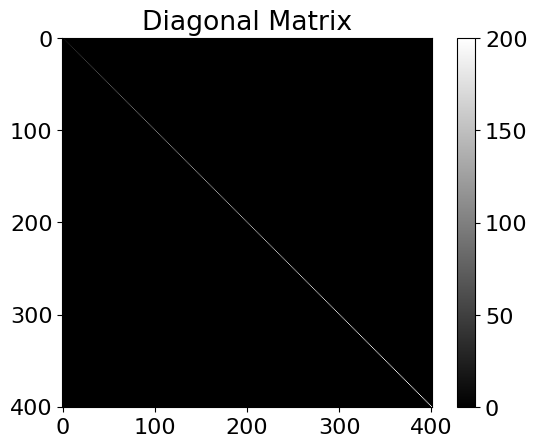

In [83]:
## plot 
plt.imshow(mat, cmap='gray')
plt.title('Diagonal Matrix')
plt.colorbar()
plt.show()

## Part 4: applying matrix filters  <span style="color:red">(Required for 509, extra credit for 409)</span>

#### 4.1 create a matrix of all zeros of size $nx \times ny$ 


where 
$nx = 1201$ and $ny = 1601$

In [84]:
nx = 1201
ny = 1601

zeromat = np.zeros([nx, ny]) 

#### 4.2 Create a function to set the values of the matrix to $0$ or $1$ 


**The function should find the distance between the origin and each point in the matrix. If the distance to a cell is even, the value of the cell should be $0$. If the distance to a cell is odd, the value of the cell should be $1$.** 

I am not sure about which kind of distances, but when you talk about odd and even value, it should be th Manhattan distance

In [85]:

def setByDist(mat):
    ''' Manhattan distance from the origin (0,0) to each element. If the distance is even, the element is set 
    to 0; if the distance is odd, the element is set to 1.

    Parameters:
    mat (numpy.ndarray): A 2D numpy array where the values will be updated based on distance.

    Returns:
    numpy.ndarray: The modified matrix with values set to 0 or 1.
    '''
    for i in range(nx):
        for j in range(ny):
            distance = i + j
            mat[i, j] = 0 if distance % 2 == 0 else 1

    return mat

zeromat = setByDist(zeromat)

#### 4.3 Plot the matrix using pplot 

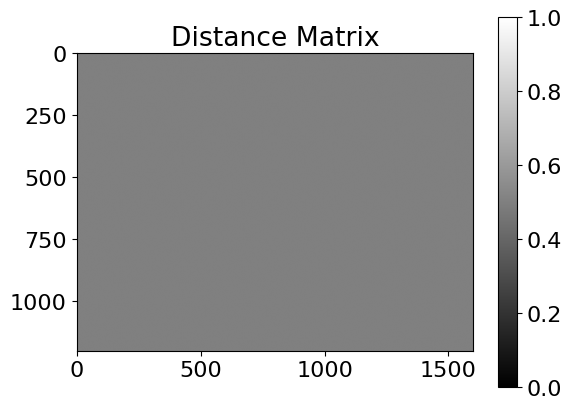

In [86]:
## plot 
plt.imshow(zeromat, cmap='gray')
plt.title('Distance Matrix')
plt.colorbar()
plt.show()

##### 4.4 The Gaussian filter (below) can be used to smooth or blur an image. Create and plot this filter in Python.


The $3 \times 3$ Gaussian: 

$$ 
G = 
\begin{bmatrix}

\frac{1}{16} & \frac{1}{8} & \frac{1}{16} \\
\frac{1}{8} & \frac{1}{4} & \frac{1}{8} \\
\frac{1}{16} & \frac{1}{8} & \frac{1}{16}

\end{bmatrix}
$$ 

In [87]:
G = np.array([
    [1/16, 1/8, 1/16],
    [1/8, 1/4, 1/8],
    [1/16, 1/8, 1/16]
])

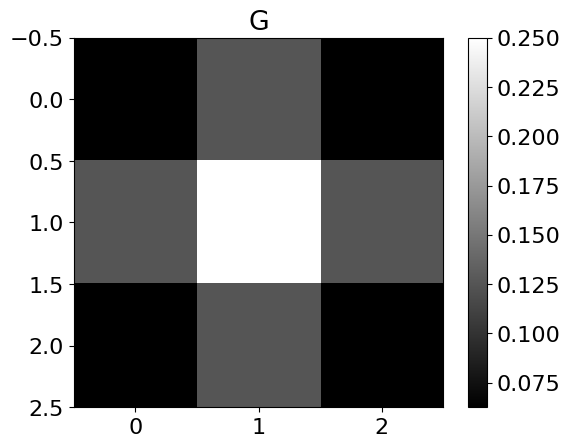

In [88]:
## plot 
plt.imshow(G, cmap='gray')
plt.title('G')
plt.colorbar()
plt.show()

#### 4.4 Apply the Gaussian filter to the matrix you created in 4.2. Then plot. 


You will want to use the scipy convolve2d function to apply the filter.

In [89]:
def blur(mat, G):
    '''
    Write a short description of the function here
    '''
    blurMat = convolve2d(mat, G)
    
    return blurMat

In [90]:
blurMat = blur(zeromat, G)

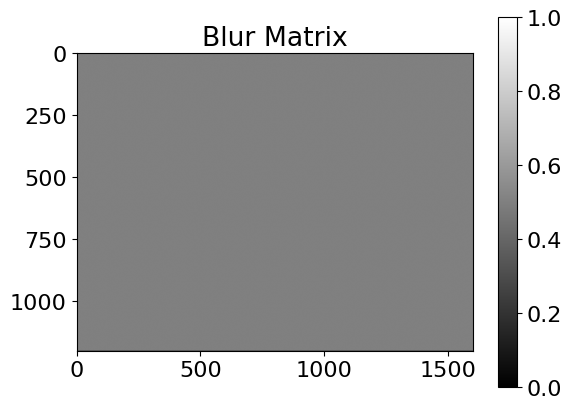

In [91]:
## plot 
plt.imshow(blurMat, cmap='gray', vmax=1)
plt.title('Blur Matrix')
plt.colorbar()
plt.show()

In [92]:
# print a part of the blurMat to see elements
blurMat[:10,:10]

array([[0.    , 0.0625, 0.125 , 0.125 , 0.125 , 0.125 , 0.125 , 0.125 ,
        0.125 , 0.125 ],
       [0.0625, 0.25  , 0.375 , 0.375 , 0.375 , 0.375 , 0.375 , 0.375 ,
        0.375 , 0.375 ],
       [0.125 , 0.375 , 0.5   , 0.5   , 0.5   , 0.5   , 0.5   , 0.5   ,
        0.5   , 0.5   ],
       [0.125 , 0.375 , 0.5   , 0.5   , 0.5   , 0.5   , 0.5   , 0.5   ,
        0.5   , 0.5   ],
       [0.125 , 0.375 , 0.5   , 0.5   , 0.5   , 0.5   , 0.5   , 0.5   ,
        0.5   , 0.5   ],
       [0.125 , 0.375 , 0.5   , 0.5   , 0.5   , 0.5   , 0.5   , 0.5   ,
        0.5   , 0.5   ],
       [0.125 , 0.375 , 0.5   , 0.5   , 0.5   , 0.5   , 0.5   , 0.5   ,
        0.5   , 0.5   ],
       [0.125 , 0.375 , 0.5   , 0.5   , 0.5   , 0.5   , 0.5   , 0.5   ,
        0.5   , 0.5   ],
       [0.125 , 0.375 , 0.5   , 0.5   , 0.5   , 0.5   , 0.5   , 0.5   ,
        0.5   , 0.5   ],
       [0.125 , 0.375 , 0.5   , 0.5   , 0.5   , 0.5   , 0.5   , 0.5   ,
        0.5   , 0.5   ]])

#### 4.5 Use filtering kernels on an image

Apply the Gaussian <span style="color:red"> AND a second filter of your choice </span> to an image. You can use any image you want, but I have included a photo of my cat, Zoe, in this folder if you want to use that. 

You should not use a predefined filter function from a library. Instead, implement the filter yourself and test it on the image.

In [93]:
def loadIMG(path):
    '''
    Loads the image from the provided path
    '''
    img = Image.open(path).convert('L')
    img_array = np.array(img)

    return img_array

In [94]:
img = loadIMG('zoe.JPG').T

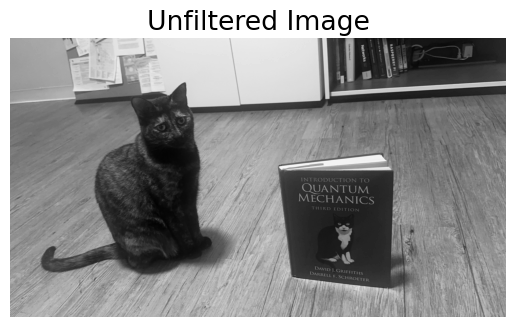

In [95]:

# Display the image using matplotlib
plt.imshow(img, origin='lower',cmap='gray')
plt.title('Unfiltered Image')
plt.axis('off')  # Hide the axes for better visualization
plt.show()

The Gaussian Kernel is commonly used for the smoothing and reducing noise. Here I use another kernel which is Edge Detection Kernel, as its name suggests, it is used for enhances edges and fine details in an image.

In [96]:
L = np.array([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]
])/100

G = np.array([
    [1/16, 1/8, 1/16],
    [1/8, 1/4, 1/8],
    [1/16, 1/8, 1/16]
])

In [97]:
imgconv = img.copy()
## apply the filter to the same image 20 times 
for i in range(20):
    imgconv = blur(imgconv, G)
    # imgconv = blur(imgconv, L)

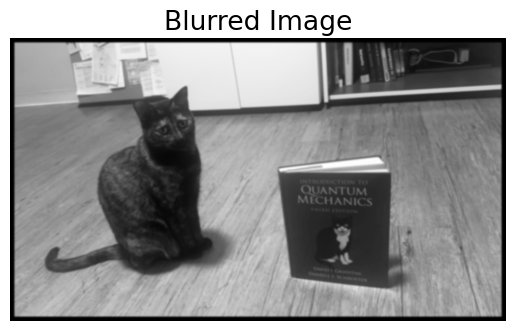

In [98]:
## plot the blurred image 
plt.imshow(imgconv, origin='lower',cmap='gray')
plt.title('Blurred Image')
plt.axis('off')  # Hide the axes for better visualization
plt.show()

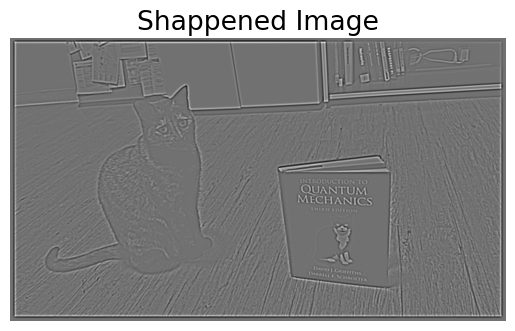

In [99]:
## compare the two images 
imgconv_sharp = blur(imgconv, L)

## plot the blurred image 
plt.imshow(imgconv_sharp, origin='lower',cmap='gray')
plt.title('Shappened Image')
plt.axis('off')  # Hide the axes for better visualization
plt.show()

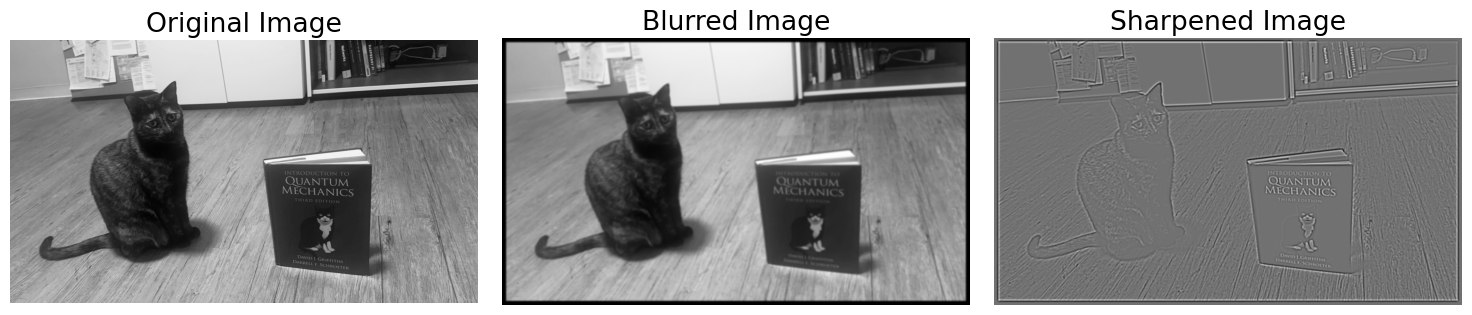

In [100]:
plt.figure(figsize=(15, 5))

# Plot the original image
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray', origin='lower')
plt.title('Original Image')
plt.axis('off')  # Hide axes

# Plot the blurred image
plt.subplot(1, 3, 2)
plt.imshow(imgconv, cmap='gray', origin='lower')
plt.title('Blurred Image')
plt.axis('off')  # Hide axes

# Plot the sharpened image
plt.subplot(1, 3, 3)
plt.imshow(imgconv_sharp, cmap='gray', origin='lower')
plt.title('Sharpened Image')
plt.axis('off')  # Hide axes

plt.tight_layout()
plt.show()